#   Support Vector Machines (SVM)

**Objectives**: Implement SVM classifiers  for linearly and nonlinearly separable datasets. 

SVM with Gaussian Radial Basis Function (RBF) kernel. 

Cross validation to select the best SVM parameters. 

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to load matlab mat files
from scipy.io import loadmat

### PART 1 - Linearly separable Data (linear SVM)

File *ex6data1.mat* consists of 2D linearly separable dataset (i.e. with linear boundary between the two classes).  

In [3]:
mat=loadmat("ex6data1.mat")
X = mat['X']
y = mat['y']

### Plot data

Plot the data to get Fig.1. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1; 4.1). You will see how this outlier affects the SVM decision boundary.

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1 ** : **Dataset 1 (ex6data1.mat)** </center></caption>

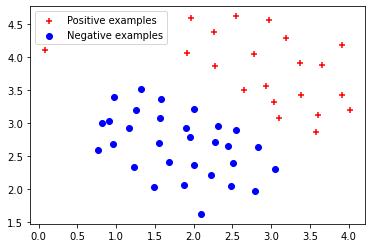

In [4]:
# Create Fig.1. Use similar code as in Lab 3.  
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o",label="Negative examples")
plt.legend(loc=0)
plt.show()

### SVM training

Scikit-learn (sklearn) is a free machine learning library for Python. It features various algorithms like support vector machine, random forests k-neighbours. It also supports Python numerical and scientific libraries like NumPy and SciPy.

From sklearn.svm import function SVC to train SVM classifier.
Choose linear kernel and train with different values of parameter C (for example C=1, C=100). 

C parameter is a positive value that controls the penalty for misclassified training examples. A large C tells the SVM to try to classify all examples correctly. C plays a role similar to $1/\lambda$ where $\lambda$ is the regularization parameter used for Logistic Regression. 

When C = 1, you should find that SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left. 

When C = 100, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural data fit. 


In [7]:
from sklearn.svm import SVC

# C = 1
classifier = SVC(C=1, kernel="linear")
classifier.fit(X,np.ravel(y))
print(classifier.score(X,y))  #ANSWER arround 98% accuracy


0.9803921568627451


### Plot data + decision boundary

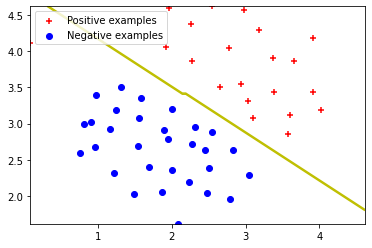

(100, 100)
(100, 100)


In [10]:
#PLot the data as in Fig.1 
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o",label="Negative examples")
plt.legend(loc=0)


# add the decision boundary line
num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")
plt.show()

print(X_1.shape)

print(X_2.shape)

In [ ]:
# Repeat SVM training for C = 100 and get accuracy 100%
classifier = SVC(C=100, kernel="linear")
classifier.fit(X,np.ravel(y))


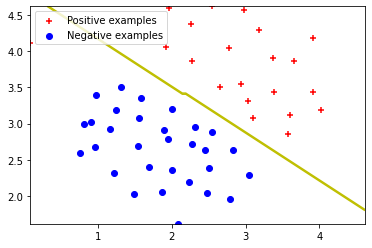

(100, 100)
(100, 100)


In [11]:
#Plot data + decision boundary
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o",label="Negative examples")
plt.legend(loc=0)

num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")
plt.show()

print(X_1.shape)

print(X_2.shape)

## PART 2 - Nonlinearly separable data  (SVM with Gaussian RBF Kernel)

Repeat the steps as in Part 1 bu now with nonlinearly separable data and Gaussian rbf kernel SVM.  

In [13]:
#Use loadmat to load the file ex6data2.mat as a dictionary with keys "X"  and "y". 
#Extract arrays X and y. Consult the code in Lab 4.
mat=loadmat("ex6data2.mat")

X2 = mat["X"]
y2 = mat["y"]

(863, 2)


### Plot data

Plot the data to get Fig.2. From the figure, you can observe that there is nonlinear decision boundary that separates the + and - examples for this dataset. By using SVM with Gaussian kernel, you will be able to learn a nonlinear decision boundary that fits better this data set.

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig.2 ** : **Dataset 2 (ex6data2.mat)** </center></caption>

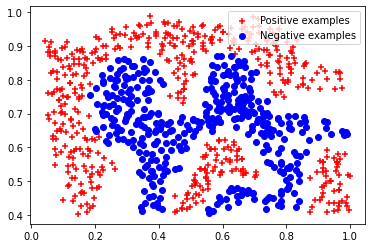

In [16]:
# Create Fig.2. Use similar code as in Part 1 (above).
pos2=(y2==1)
neg2=(y2==0)
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="b",marker="o",label="Negative examples")
plt.legend(loc=1)
plt.show()


### Gaussian SVM training

Choose *rbf* (Radial Basis Function) kernel, which corresponds to Gaussian kernel. 

**gamma** parameter is the inverse of the standard deviation of the RBF kernel (gamma = $1/\sigma$). 
**gamma** is used as a similarity measure between two points. 

Small gamma value defines a Gaussian function with a large variance => two points are considered similar even if they are relatively far away from each other. 

Large gamma value defines a Gaussian function with a small variance => two points are considered similar if they are very close to each other.

In [17]:
#call SVC with rbf kernel and gamma =30 and get a score of arround 97% accuracy
classifier2 = SVC(kernel="rbf", gamma=30)
classifier2.fit(X2,np.ravel(y2))
print(classifier2.score(X2,y2)) 

0.9721900347624566


### Plot data + decision boundary

Observe that the decision boundary is able to separate most of the positive and negative examples correctly. 

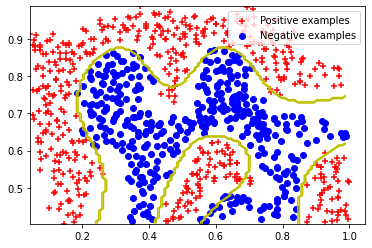

In [28]:
#Consut the code in Part 1
pos2=(y2==1)
neg2=(y2==0)
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="b",marker="o",label="Negative examples")
plt.legend(loc=1)

num2=100
X2_1,X2_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=num2),np.linspace(X2[:,1].min(),X2[:,1].max(),num=num2))

plt.contour(X2_1,X2_2,classifier2.predict(np.array([X2_1.ravel(),X2_2.ravel()]).T).reshape(X2_1.shape),1,colors="y")
plt.show()


### PART 3  - Nonlinear SVM with Gaussian Kernels, optimization of C and  $\sigma$ (Dataset 3)

File *ex6data3.mat* contains training data (X,y) and validation data (Xval, yval). 
Load them and plot the training data to get Fig.3. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> **Fig.3 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [39]:
#call loadmat to load the file ex6data3.mat as a dictionary with keys "X", "y", "Xval", "yval"
mat=loadmat("ex6data3.mat")
X3 = mat["X"]
y3 = mat["y"]
Xval = mat["Xval"]
yval = mat["yval"]

(211, 1)


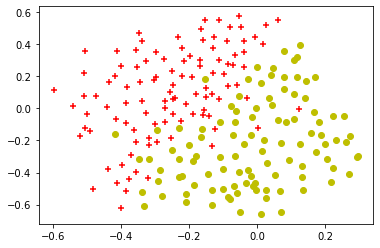

In [31]:
# Create Fig.3. Use similar code as above. 
pos3=(y3==1)
neg3=(y3==0)
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",label="Negative examples")


plt.show()

### Hyperparameter tuning

The task is to use the validation set Xval, yval to determine the best C and  $\sigma$ parameters.

For both C and $\sigma$, it is suggested to try the following values (0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30). 

Function *dataset3Params* tries all possible pairs of values for C and  $\sigma$. For example, for the 8 values listed above, a total of 8^2 = 64 different models will be trained and evaluated (on the validation set). For the best parameters, the SVM should return a decision boundary similar to Fig. 4.

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> **Fig.4 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [33]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    dataset3Params returns the optimal C and gamma(1/sigma) based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [41]:
vals = [0.01, 0.03,0.1,0.3,1,3,10,30]
best_C, best_gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)

#What are the best C and sigma ?
print(best_C)
print(best_gamma)

#Build an SVM classifier with the best C and gamma and get classifier score of about 95% ? (training data accuracy) 
classifier3 = SVC(C=best_C, gamma=best_gamma)
classifier3.fit(X3,np.ravel(y3))
#prediction = classifier3.predict(Xval)
print(classifier3.score(Xval,yval))

print(yval.shape)

print(y3.shape)

0.3
100.0
0.965
(200, 1)
(211, 1)


### Plot data + decision boundary

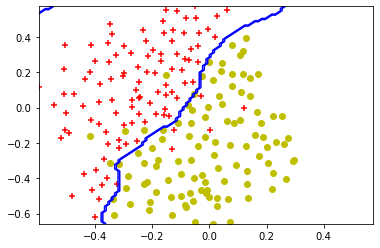

In [43]:
#Create Fig.4
pos3=(y3==1)
neg3=(y3==0)
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+", label="Positive examples")
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",label="Negative examples")

num3=100
X3_1,X3_2 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=num3),np.linspace(X3[:,1].min(),X3[:,1].max(),num=num3))
plt.contour(X3_1,X3_2,classifier3.predict(np.array([X3_1.ravel(),X3_2.ravel()]).T).reshape(X3_1.shape),1,colors="b")

plt.show()